Name: Gurjit Singh      
Sid: N01634963
Assignment4 Machine Learning

# Importing Libraries and Dependencies

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset

In [ ]:

df = pd.read_csv('loan_data.csv')

# Step 2: Explore dataset

In [ ]:

df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
   credit.policy             purpose  int.rate  installment  lo

# Step 3 Data Visualization and Preprocessing

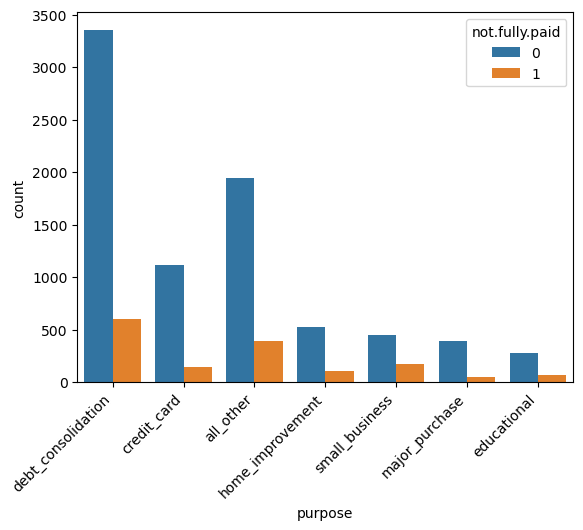

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'not.fully.paid' to categorical and ensure no numerical issues
df['not.fully.paid'] = df['not.fully.paid'].astype(str)  # Convert to string (categorical)
df['purpose'] = df['purpose'].astype(str)  # Ensure 'purpose' is also string

# Step 3: Data Visualization 
sns.countplot(data=df, x='purpose', hue='not.fully.paid')
plt.xticks(rotation=45, ha='right')
plt.show()


# Step 4: Data Preprocessing

In [ ]:

# Convert categorical target variable to string for encoding
df['not.fully.paid'] = df['not.fully.paid'].astype(str)

In [32]:
# One-hot encoding for categorical features
pre_df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Step 5: Split dataset into training and testing sets

In [ ]:

X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid'].astype(int)  # Convert target to numerical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)


# Step 6: Train Naïve Bayes model with Laplacian correction

In [ ]:

laplace_model = GaussianNB(var_smoothing=1e-9)  # Laplacian correction
laplace_model.fit(X_train, y_train)


GaussianNB()

# Step 7: Make Predictions

In [ ]:

y_pred = laplace_model.predict(X_test)

# Step 8: Evaluate the model

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after Laplacian correction: {accuracy:.2%}')

Accuracy after Laplacian correction: 82.06%


# Step 9: Compute and Visualize the Confusion Matrix

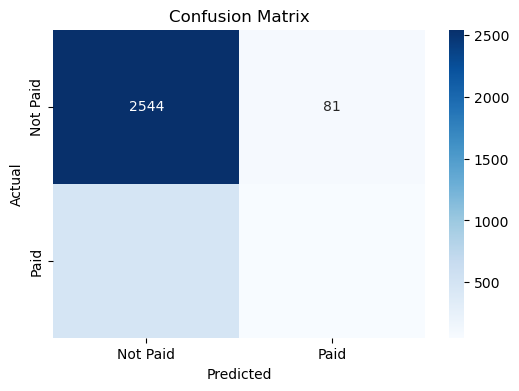

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Paid", "Paid"], yticklabels=["Not Paid", "Paid"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()